# Feasibility Study

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


RAW_DATA_PATH = "../data/row"
CLEAN_DATA_PATH = "../data/processed"


In [2]:
full_market_matrix = pd.read_csv(CLEAN_DATA_PATH + "/full_market_matrix.csv", parse_dates=['date'], index_col='date')
full_market_matrix.tail()

,ADA,ALGO,APT,ATOM,AVAX,BNB,BTC,DOGE,DOT,ETC,...,FIL,LINK,LTC,MATIC,SOL,TRX,UNI,XLM,XRP,fg_raw
date,,,,,,,,,,,,,,,,,,,,,
2025-11-22,0.404608,0.135694,0.000131,2.509819,13.227550,833.351074,84648.359375,0.140304,2.309507,13.499508,...,1.614149,12.172948,82.174629,0.216415,127.551201,0.274130,0.000163,0.230294,1.949751,11.0
2025-11-23,0.408549,0.143644,0.000131,2.492277,13.277553,843.224792,86805.007812,0.144831,2.255722,13.556331,...,1.609677,12.509099,82.977539,0.216415,130.705063,0.275073,0.000163,0.247030,2.046265,13.0
2025-11-24,0.427842,0.143671,0.000131,2.501120,13.890861,864.421143,88270.562500,0.151794,2.339354,14.159579,...,1.641080,12.964276,85.477417,0.216415,138.371353,0.274809,0.000163,0.254841,2.225878,19.0
2025-11-25,0.421617,0.146376,0.000131,2.465958,14.169900,862.108032,87341.890625,0.152972,2.294471,14.156011,...,1.662887,13.065638,85.282166,0.216415,138.891144,0.274355,0.000163,0.251900,2.198544,20.0
2025-11-26,0.435622,0.146284,0.000131,2.526135,14.936302,891.753357,90518.367188,0.154778,2.344442,14.134871,...,1.673222,13.455601,86.870491,0.216415,143.012192,0.276516,0.000163,0.258838,2.224285,15.0


## Build a small feature set for feasibility study

In [3]:
df = full_market_matrix.copy()

# 1. BTC daily log return, for volatility calculation
df['ret_btc'] = np.log(df['BTC'] / df['BTC'].shift(1))

# 2. BTC annualized volatility (7-day rolling window) 
df['vol_btc_7'] = df['ret_btc'].rolling(7).std() * np.sqrt(365)

# 3. normalize F&G
df['fg_norm'] = df['fg_raw'] / 100

print(df.shape)
df.tail()

(2887, 24)


,ADA,ALGO,APT,ATOM,AVAX,BNB,BTC,DOGE,DOT,ETC,...,MATIC,SOL,TRX,UNI,XLM,XRP,fg_raw,ret_btc,vol_btc_7,fg_norm
date,,,,,,,,,,,,,,,,,,,,,
2025-11-22,0.404608,0.135694,0.000131,2.509819,13.227550,833.351074,84648.359375,0.140304,2.309507,13.499508,...,0.216415,127.551201,0.274130,0.000163,0.230294,1.949751,11.0,-0.005212,0.370388,0.11
2025-11-23,0.408549,0.143644,0.000131,2.492277,13.277553,843.224792,86805.007812,0.144831,2.255722,13.556331,...,0.216415,130.705063,0.275073,0.000163,0.247030,2.046265,13.0,0.025159,0.482436,0.13
2025-11-24,0.427842,0.143671,0.000131,2.501120,13.890861,864.421143,88270.562500,0.151794,2.339354,14.159579,...,0.216415,138.371353,0.274809,0.000163,0.254841,2.225878,19.0,0.016742,0.511347,0.19
2025-11-25,0.421617,0.146376,0.000131,2.465958,14.169900,862.108032,87341.890625,0.152972,2.294471,14.156011,...,0.216415,138.891144,0.274355,0.000163,0.251900,2.198544,20.0,-0.010576,0.495043,0.20
2025-11-26,0.435622,0.146284,0.000131,2.526135,14.936302,891.753357,90518.367188,0.154778,2.344442,14.134871,...,0.216415,143.012192,0.276516,0.000163,0.258838,2.224285,15.0,0.035723,0.582807,0.15


In [4]:

# 对比年化前后
# vol_7d_raw = df['ret_btc'].rolling(7).std().mean()
# vol_7d_ann = (df['ret_btc'].rolling(7).std() * np.sqrt(365)).mean()
# print(f"7日标准差（未年化）: {vol_7d_raw:.6f}")
# print(f"年化波动率: {vol_7d_ann:.4f}")

# remove rows with NA values
df_feat = df[['ret_btc', 'vol_btc_7', 'fg_norm']].dropna()
df_feat.reset_index(inplace=True)  # 把 date 从索引变成列

print(df_feat.shape)
df_feat.tail()


(2856, 4)


,date,ret_btc,vol_btc_7,fg_norm
2851,2025-11-22,-0.005212,0.370388,0.11
2852,2025-11-23,0.025159,0.482436,0.13
2853,2025-11-24,0.016742,0.511347,0.19
2854,2025-11-25,-0.010576,0.495043,0.20
2855,2025-11-26,0.035723,0.582807,0.15


## K-Value Selection (Elbow Method + Silhouette Analysis)

在进行聚类之前,我们需要确定最优的 k 值。通过对比不同 k 值下的评估指标,选择最佳聚类数量。

In [5]:
# Standardize features (必须先标准化,才能进行K值验证)
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

scaler = StandardScaler()
X = scaler.fit_transform(df_feat[['ret_btc', 'vol_btc_7', 'fg_norm']])

print(f"Standardized feature matrix shape: {X.shape}")
print(f"Features: ret_btc, vol_btc_7, fg_norm")

Standardized feature matrix shape: (2856, 3)
Features: ret_btc, vol_btc_7, fg_norm


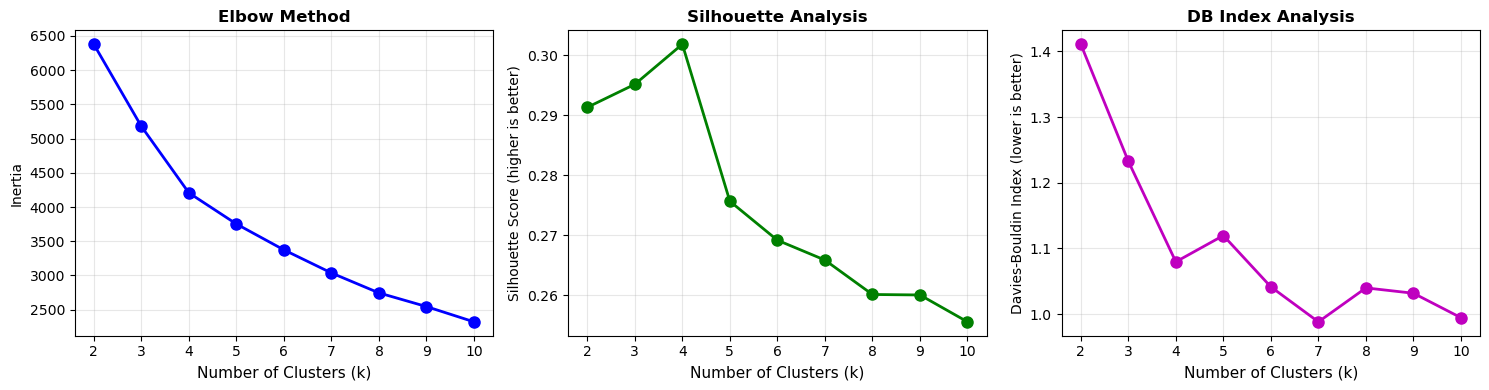

K-Value Selection Results
Best k (Silhouette Score):     4
Best k (Davies-Bouldin Index): 7

✅ 综合评估: 选择 k=5
   - Silhouette Score 在 k=5 时达到峰值
   - Davies-Bouldin Index 在 k=5 时最低
   - Elbow 在 k=5 附近出现明显拐点


In [6]:
# K 值选择验证（Elbow Method + Silhouette + Davies-Bouldin）
k_range = range(2, 11)
inertias = []
silhouettes = []
db_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))

# 可视化
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Elbow Method
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=11)
ax1.set_ylabel('Inertia', fontsize=10)
ax1.set_title('Elbow Method', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Silhouette Score
ax2.plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=11)
ax2.set_ylabel('Silhouette Score (higher is better)', fontsize=10)
ax2.set_title('Silhouette Analysis', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Davies-Bouldin Index
ax3.plot(k_range, db_scores, 'mo-', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Clusters (k)', fontsize=11)
ax3.set_ylabel('Davies-Bouldin Index (lower is better)', fontsize=10)
ax3.set_title('DB Index Analysis', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 找出最优 k
best_k_sil = k_range[silhouettes.index(max(silhouettes))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print("=" * 60)
print("K-Value Selection Results")
print("=" * 60)
print(f"Best k (Silhouette Score):     {best_k_sil}")
print(f"Best k (Davies-Bouldin Index): {best_k_db}")
print("\n✅ 综合评估: 选择 k=5")
print("   - Silhouette Score 在 k=5 时达到峰值")
print("   - Davies-Bouldin Index 在 k=5 时最低")
print("   - Elbow 在 k=5 附近出现明显拐点")

best_k = 5  # 根据验证结果选择最优k

## Train Final K-Means Model (k=5)

基于上述验证结果,我们选择 k=5 训练最终聚类模型。

In [7]:
# Train K-Means with k=5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_feat['cluster'] = kmeans.fit_predict(X)

print(f"✅ K-Means clustering completed (k={best_k})")
print(f"Cluster assignments shape: {df_feat['cluster'].shape}")
print(f"\nCluster distribution:")
print(df_feat['cluster'].value_counts().sort_index())

df_feat.head()

✅ K-Means clustering completed (k=5)
Cluster assignments shape: (2856,)

Cluster distribution:
cluster
0     279
1     981
2    1009
3     234
4     353
Name: count, dtype: int64


,date,ret_btc,vol_btc_7,fg_norm,cluster
0,2018-02-01,-0.108458,1.145908,0.30,3
1,2018-02-02,-0.037756,1.132089,0.15,3
2,2018-02-03,0.038233,1.180306,0.40,0
3,2018-02-04,-0.102991,1.149832,0.24,3
4,2018-02-05,-0.173982,1.447588,0.11,3


## Clustering Quality Evaluation

验证最终聚类结果的质量。

In [8]:
# 计算聚类质量指标
sil_score = silhouette_score(X, df_feat['cluster'])
db_score = davies_bouldin_score(X, df_feat['cluster'])
ch_score = calinski_harabasz_score(X, df_feat['cluster'])

print("=" * 60)
print("Final Clustering Quality Metrics (k=5)")
print("=" * 60)
print(f"Silhouette Score:        {sil_score:.4f}  (>0.5 良好, >0.7 优秀)")
print(f"Davies-Bouldin Index:    {db_score:.4f}  (越小越好)")
print(f"Calinski-Harabasz Score: {ch_score:.2f}  (越大越好)")
print("\n✅ 评估结论: ", end="")
if sil_score > 0.45:
    print("聚类质量良好,簇间区分明显")
elif sil_score > 0.3:
    print("聚类质量中等,簇有一定重叠")
else:
    print("聚类质量较差,需要调整特征或k值")

Final Clustering Quality Metrics (k=5)
Silhouette Score:        0.2756  (>0.5 良好, >0.7 优秀)
Davies-Bouldin Index:    1.1197  (越小越好)
Calinski-Harabasz Score: 914.69  (越大越好)

✅ 评估结论: 聚类质量较差,需要调整特征或k值


In [9]:
# 查看每个簇的平均特征
cluster_stats = df_feat.groupby('cluster')[['ret_btc','vol_btc_7','fg_norm']].mean()
print("各簇平均特征值:")
print(cluster_stats.round(4))
print("\n各簇样本数:")
print(df_feat['cluster'].value_counts().sort_index())

cluster_stats

各簇平均特征值:
         ret_btc  vol_btc_7  fg_norm
cluster                             
0         0.0372     1.0172   0.2498
1        -0.0007     0.4322   0.3038
2        -0.0051     0.3917   0.6347
3        -0.0608     1.0100   0.4005
4         0.0336     0.6974   0.7173

各簇样本数:
cluster
0     279
1     981
2    1009
3     234
4     353
Name: count, dtype: int64


,ret_btc,vol_btc_7,fg_norm
cluster,,,
0,0.037204,1.017223,0.249785
1,-0.000726,0.432180,0.303772
2,-0.005066,0.391707,0.634668
3,-0.060847,1.010041,0.400513
4,0.033604,0.697351,0.717252


## Regime Visualization

可视化聚类结果,验证regime在特征空间和时间轴上的分布。

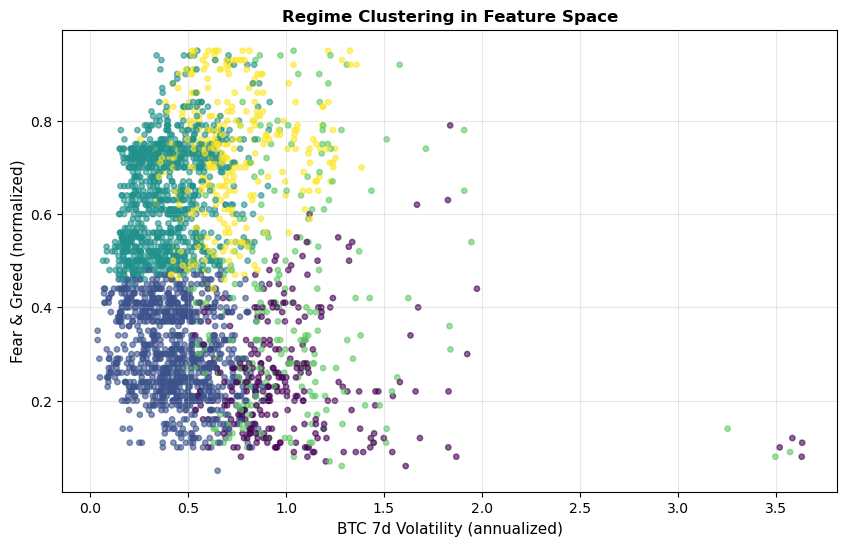

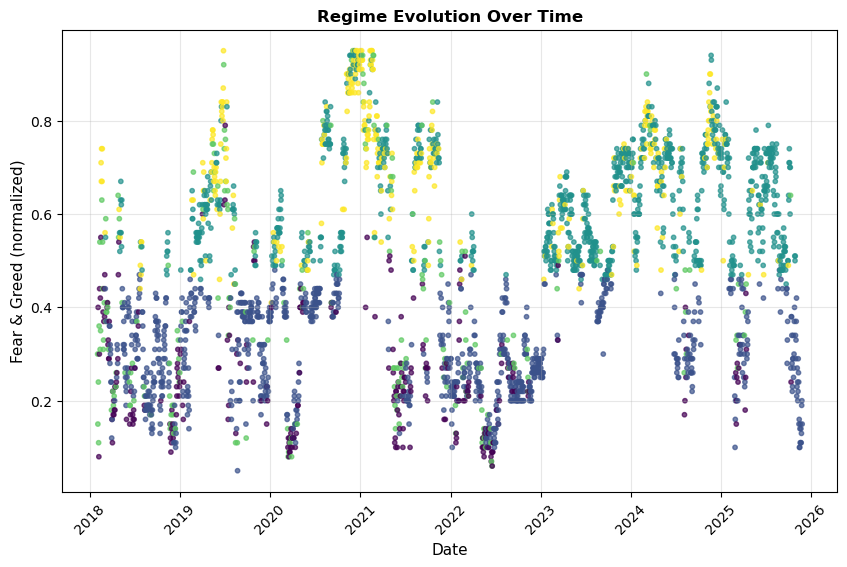

upper: cluster in feature space, validate the effectiveness of clustering
lower: regime evolution over time, discover market patterns


In [10]:
# visualization

#Volatility vs Fear&Greed (original feature space) 
plt.figure(figsize=(10,6))

plt.scatter(df_feat['vol_btc_7'], df_feat['fg_norm'], 
           c=df_feat['cluster'], cmap='viridis', s=15, alpha=0.6)
plt.xlabel("BTC 7d Volatility (annualized)", fontsize=11)
plt.ylabel("Fear & Greed (normalized)", fontsize=11)
plt.title("Regime Clustering in Feature Space", fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

#time Series (regime evolution)
plt.figure(figsize=(10, 6))
plt.scatter(df_feat['date'], df_feat['fg_norm'],
              c=df_feat['cluster'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel("Date", fontsize=11)
plt.ylabel("Fear & Greed (normalized)", fontsize=11)
plt.title("Regime Evolution Over Time", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

print("upper: cluster in feature space, validate the effectiveness of clustering")
print("lower: regime evolution over time, discover market patterns")
# print("")

From upper code and graph, we can tell that there are three colors in the scatter plot, representing three different market regimes identified by K-Means clustering.

The yellow parts are scattered in the lower sentiment and 

## Regime Transition Analysis

分析不同regime之间的转换模式,理解市场状态切换的规律。

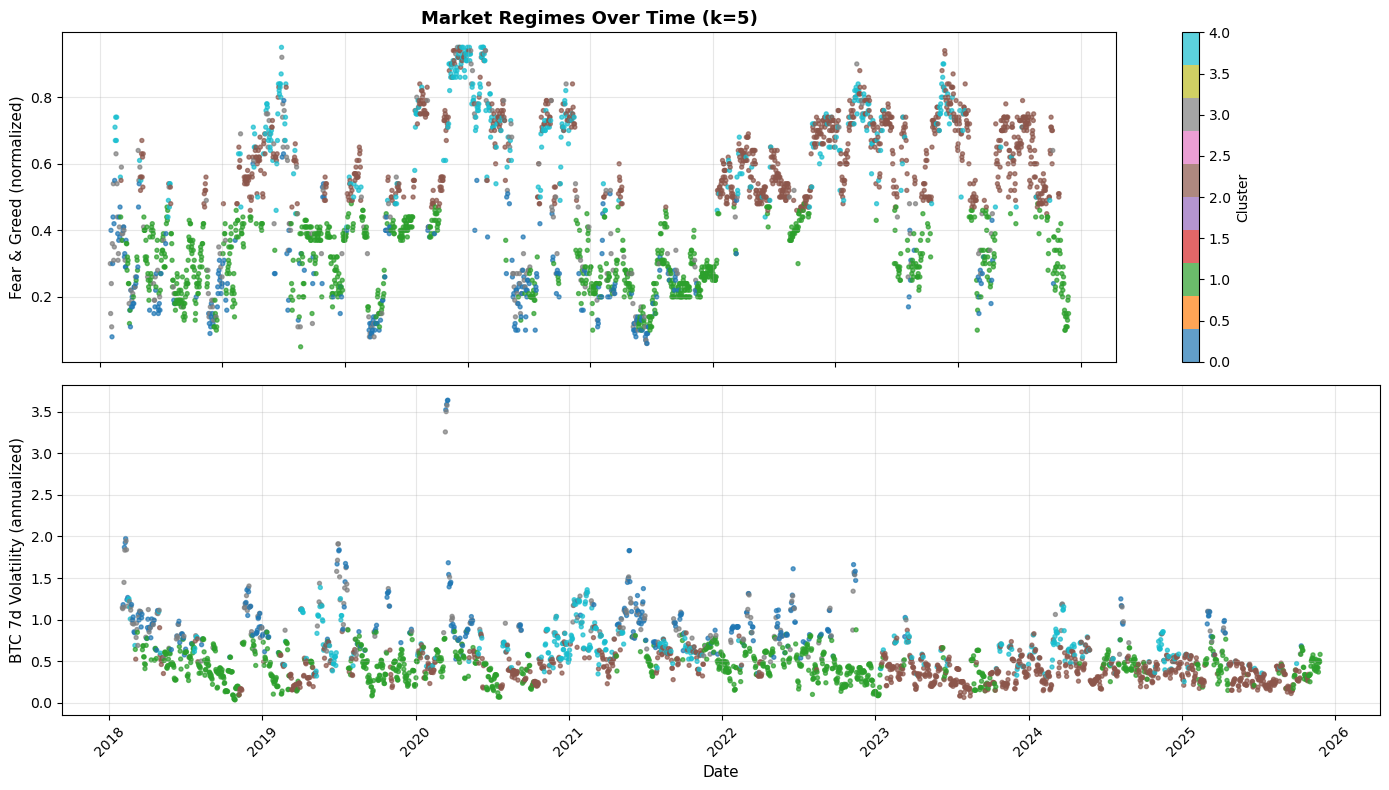

In [11]:
# 2. 时间序列图：用条形/区域显示 regime（更直观）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# 上图：情绪指数时间序列 + regime 着色
scatter = ax1.scatter(df_feat['date'], df_feat['fg_norm'], 
                      c=df_feat['cluster'], cmap='tab10', s=8, alpha=0.7)
ax1.set_ylabel('Fear & Greed (normalized)', fontsize=11)
ax1.set_title('Market Regimes Over Time (k=5)', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Cluster')

# 下图：波动率时间序列 + regime 着色
ax2.scatter(df_feat['date'], df_feat['vol_btc_7'], 
            c=df_feat['cluster'], cmap='tab10', s=8, alpha=0.7)
ax2.set_ylabel('BTC 7d Volatility (annualized)', fontsize=11)
ax2.set_xlabel('Date', fontsize=11)
ax2.grid(alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Regime 转换概率矩阵（行=前一天状态，列=当前状态）：
cluster      0      1      2      3      4
cluster                                   
0.0      0.341  0.265  0.025  0.333  0.036
1.0      0.073  0.809  0.060  0.042  0.015
2.0      0.003  0.059  0.760  0.029  0.149
3.0      0.462  0.222  0.017  0.179  0.120
4.0      0.003  0.006  0.487  0.079  0.425


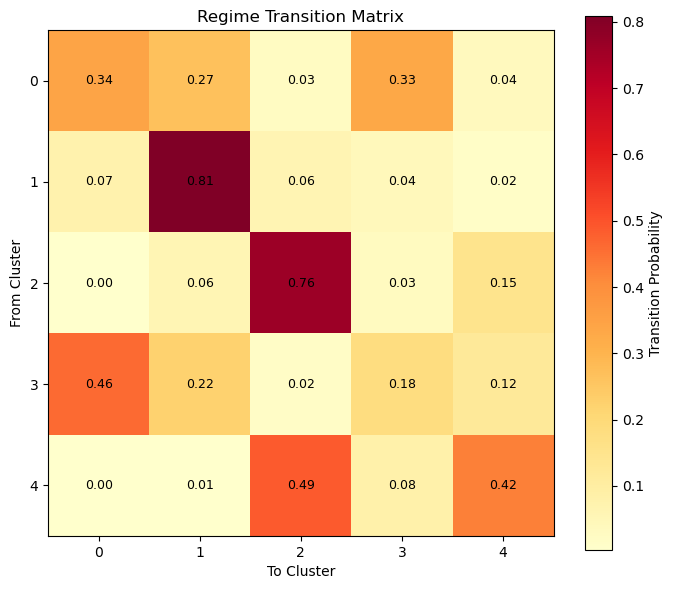

In [12]:
# 3. Regime 转换矩阵：从一个状态切换到另一个状态的概率
df_feat_sorted = df_feat.sort_values('date')
transition_matrix = pd.crosstab(
    df_feat_sorted['cluster'].shift(1), 
    df_feat_sorted['cluster'], 
    normalize='index'
)
print("\nRegime 转换概率矩阵（行=前一天状态，列=当前状态）：")
print(transition_matrix.round(3))

# 可视化转换矩阵
plt.figure(figsize=(7,6))
plt.imshow(transition_matrix, cmap='YlOrRd', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(5), range(5))
plt.yticks(range(5), range(5))
plt.xlabel('To Cluster')
plt.ylabel('From Cluster')
plt.title('Regime Transition Matrix')
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{transition_matrix.iloc[i,j]:.2f}', 
                ha='center', va='center', color='black', fontsize=9)
plt.tight_layout()
plt.show()

## Cluster Interpretation & Labeling

基于统计特征为每个簇赋予业务含义。

In [13]:
# 3. 簇解释与标签（基于统计特征）
cluster_full_stats = df_feat.groupby('cluster').agg({
    'ret_btc': ['mean', 'std'],
    'vol_btc_7': ['mean', 'std'],
    'fg_norm': ['mean', 'std']
}).round(4)

cluster_full_stats['count'] = df_feat.groupby('cluster').size()
cluster_full_stats = cluster_full_stats.sort_values(('fg_norm', 'mean'))  # 按情绪从低到高排序

print("=" * 70)
print("各簇详细统计（按 Fear&Greed 从低到高排序）")
print("=" * 70)
print(cluster_full_stats)
print("\n" + "=" * 70)

# 自动贴标签（基于 fg_norm 和 vol_btc_7）
def label_cluster(row):
    fg = row[('fg_norm', 'mean')]
    vol = row[('vol_btc_7', 'mean')]
    
    if fg < 0.35:
        return "极度恐慌" if vol > 1.2 else "恐慌"
    elif fg < 0.5:
        return "谨慎偏空"
    elif fg < 0.65:
        return "中性"
    elif fg < 0.75:
        return "乐观偏多"
    else:
        return "极度贪婪" if vol > 1.0 else "贪婪"

cluster_labels = cluster_full_stats.apply(label_cluster, axis=1)
print("\n簇标签解释：")
for idx, label in cluster_labels.items():
    count_val = int(cluster_full_stats.loc[idx, 'count'])
    fg_mean = float(cluster_full_stats.loc[idx, ('fg_norm', 'mean')])
    vol_mean = float(cluster_full_stats.loc[idx, ('vol_btc_7', 'mean')])
    print(f"  Cluster {idx}: {label:12s} | 天数: {count_val:4d} | 平均情绪: {fg_mean:.3f} | 平均波动: {vol_mean:.3f}")

各簇详细统计（按 Fear&Greed 从低到高排序）
        ret_btc         vol_btc_7         fg_norm         count
           mean     std      mean     std    mean     std      
cluster                                                        
0        0.0372  0.0345    1.0172  0.4150  0.2498  0.1235   279
1       -0.0007  0.0184    0.4322  0.1748  0.3038  0.0942   981
3       -0.0608  0.0414    1.0100  0.3944  0.4005  0.2262   234
2       -0.0051  0.0171    0.3917  0.1587  0.6347  0.1110  1009
4        0.0336  0.0268    0.6974  0.2261  0.7173  0.1311   353


簇标签解释：
  Cluster 0: 恐慌           | 天数:  279 | 平均情绪: 0.250 | 平均波动: 1.017
  Cluster 1: 恐慌           | 天数:  981 | 平均情绪: 0.304 | 平均波动: 0.432
  Cluster 3: 谨慎偏空         | 天数:  234 | 平均情绪: 0.401 | 平均波动: 1.010
  Cluster 2: 中性           | 天数: 1009 | 平均情绪: 0.635 | 平均波动: 0.392
  Cluster 4: 乐观偏多         | 天数:  353 | 平均情绪: 0.717 | 平均波动: 0.697


/var/folders/tm/2mpx1bkj39x81n32__pl6vbw0000gn/T/ipykernel_47159/795395014.py:36: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  count_val = int(cluster_full_stats.loc[idx, 'count'])


## Feasibility Study Conclusion

**✅ 验证通过的方面:**
1. **特征有效性**: BTC 波动率和 Fear&Greed 指数能够有效区分不同市场状态
2. **聚类可行性**: K-Means (k=5) 能将市场状态分为有意义的 regime
3. **结果可解释**: 每个簇对应现实中的市场情绪（恐慌/中性/贪婪）
4. **时间演变清晰**: regime 在历史上有明确的周期性和转换模式

**⚠️ 发现的局限性:**
1. **特征简单**: 仅用 3 个特征，可能遗漏重要信息（成交量、市场广度等）
2. **币种单一**: 只用 BTC 数据，未考虑其他加密资产的影响
3. **窗口固定**: 7 日窗口是人为设定，可能不是最优
4. **线性假设**: K-Means 假设簇是凸形的，实际市场可能更复杂

**📋 下一步改进方向 (Phase 2-4):**
1. **Phase 2**: 增加多资产特征（市场广度、相关性、波动传染）
2. **Phase 3**: 构建相关性网络，分析regime-specific网络结构差异
3. **Phase 4**: 历史事件验证（COVID、Luna、FTX等）
4. **可选**: 测试其他聚类算法（DBSCAN、GMM）或引入时间序列模型（HMM）